In [1]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import itertools
import warnings

In [2]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

sales = pd.read_csv('data/sales-cars.csv', parse_dates=['Month'], date_parser=parser, index_col=['Month'])
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


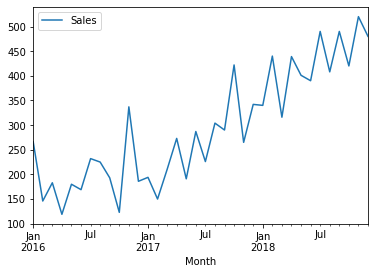

In [3]:
sales.plot()

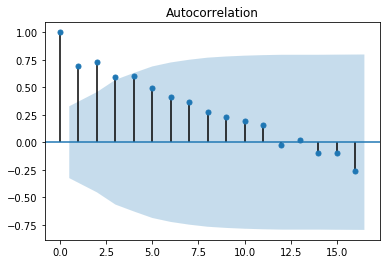

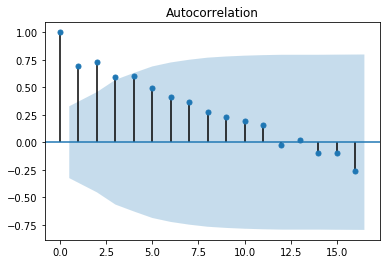

In [4]:
## Let's check stationarity.
## By the looks of it it doesn't look to be stationary
## Also, there's trend
plot_acf(sales)

In [5]:
## Let's try and convert data into stationary
sales_diff1 = sales.diff(periods=1)
sales_diff1.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [6]:
## remove NAN
sales_diff1 = sales_diff1[1:]
sales_diff1.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


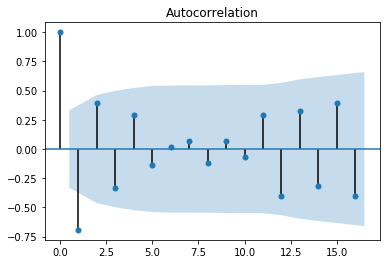

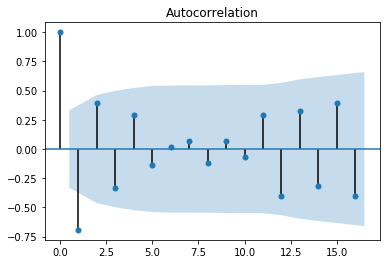

In [7]:
plot_acf(sales_diff1)

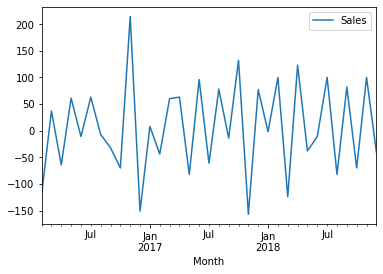

In [8]:
sales_diff1.plot()

In [9]:
X = sales.values
train = X[0:27]
test = X[27:]
print(train.shape)
print(test.shape)


(27, 1)
(9, 1)


In [10]:
## Auto Regressive (AR) Model 
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [11]:
predictions = model_ar_fit.predict(start=27, end=36)
predictions

array([398.22922886, 368.27242294, 429.47485941, 379.17750391,
       431.35262347, 399.90234723, 433.3589338 , 418.74469463,
       453.45711544, 429.65174489])

In [12]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

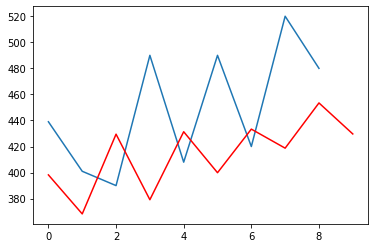

In [13]:
plt.plot(test)
plt.plot(predictions, color='red')

In [14]:
## ARIMA
## p = periods taken for autoregressive model
## d = order of difference
## q = no of lags in moving average model
model_arima = ARIMA(train, order=(3,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

295.9979353418416


In [15]:
predictions_arima = model_arima_fit.forecast(steps=9)[0]
predictions
predictions.shape

(10,)

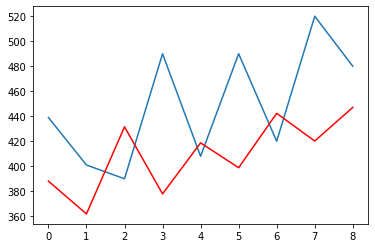

In [16]:
plt.plot(test)
plt.plot(predictions_arima,color='red')

In [17]:
p=d=q=range(0,5)
pdq_combi = list(itertools.product(p,d,q))
len(pdq_combi)

125

In [18]:
warnings.filterwarnings('ignore')
for param in pdq_combi:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448093894775
(0, 0, 2) 315.25060028736823
(0, 0, 3) nan
(0, 0, 4) 310.166932857633
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415381062906
(0, 1, 2) 296.3229226907679
(0, 1, 3) 298.3120211739366
(0, 1, 4) 300.3393975617894
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194741083694
(0, 2, 2) 290.39835443517234
(0, 2, 3) 292.9858910867966
(1, 0, 0) 316.16687175281163
(1, 0, 1) 313.0487174408613
(1, 0, 2) 310.97906422827
(1, 1, 0) 298.83254422707273
(1, 1, 1) 297.1256511258505
(1, 1, 2) 299.4716667062747
(1, 1, 3) 301.2851180948011
(1, 1, 4) 299.97873239707246
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.996957362129
(2, 0, 1) 340.3100624725141
(2, 0, 4) 350.751778546634
(2, 1, 0) 300.2089561239981
(2, 1, 1) 297.9999930167491
(2, 1, 2) 298.5505428130232
(2, 1, 3) 302.87208314763
(2, 2, 0) 306.2975856431996
(3, 0, 0) 312.9838587440775
(3, 0, 1) 335.07465949815673
(3, 1, 0) 294.8543584218757
(3, 1, 1) 295.9979353418416
(3, 1, 2) 292.6686238693999
(3

In [19]:
model_arima = ARIMA(train, order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)
predictions_arima = model_arima_fit.forecast(steps=10)
predictions_arima

297.1619839145253


(array([396.04574191, 355.94562656, 413.09393882, 374.50720229,
        446.94167439, 378.62225722, 406.36993186, 411.38189981,
        475.88973685, 415.38371406]),
 array([ 51.33833594,  51.38230078,  59.60880124,  63.58903154,
         88.4883094 ,  97.50949376, 112.97920868, 126.25798602,
        143.25908562, 159.89937199]),
 array([[295.42445243, 496.66703138],
        [255.23816759, 456.65308553],
        [296.26283523, 529.92504242],
        [249.87499067, 499.13941391],
        [273.50777491, 620.37557387],
        [187.5071613 , 569.73735314],
        [184.93475184, 627.80511188],
        [163.92079446, 658.84300516],
        [195.10708857, 756.67238512],
        [101.98670381, 728.78072431]]))

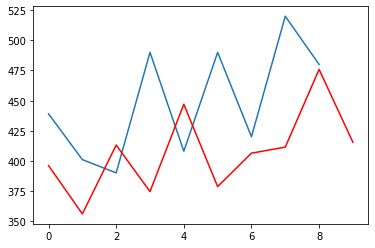

In [20]:
plt.plot(test)
plt.plot(predictions_arima[0],color='red')

In [21]:
mean_squared_error = mean_squared_error(test, predictions_arima[0][0:9])
mean_squared_error

4852.100165470362